# Energy Dataset

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [33]:
df = pd.read_csv('datasets/energy.csv', index_col='Unnamed: 0')
df.head()

,date_time,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 0 to 19734
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_time   19735 non-null  object
 1   Appliances  19735 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 462.5+ KB


In [35]:
df.shape

(19735, 2)

In [36]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 0 to 19734
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_time   19735 non-null  datetime64[ns]
 1   Appliances  19735 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 462.5 KB


In [38]:
# Extract hour
df['hour'] = df['date_time'].dt.hour

# Extract date
df['date'] = df['date_time'].dt.day

# Extract month
df['month'] = df['date_time'].dt.month

# Extract year
df['year'] = df['date_time'].dt.year

# Extract day (day of the week)
df['day'] = df['date_time'].dt.dayofweek+1

In [39]:
df.head()

,date_time,Appliances,hour,date,month,year,day
0,2016-01-11 17:00:00,60,17,11,1,2016,1
1,2016-01-11 17:10:00,60,17,11,1,2016,1
2,2016-01-11 17:20:00,50,17,11,1,2016,1
3,2016-01-11 17:30:00,50,17,11,1,2016,1
4,2016-01-11 17:40:00,60,17,11,1,2016,1


In [48]:
def plt_time_dist(y, df, ylabel=None):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    if ylabel == None:
        ylabel = y
    # Create bar plots
    if 'hour' in df:
        sns.barplot(x='hour', y = y, data=df, errorbar=None, ax=axes[0, 0])
        axes[0, 0].set_xlabel('Hour')
        axes[0, 0].set_ylabel(ylabel)
    else:
        axes[0, 0].axis('off')
    if 'date' in df:
        sns.barplot(x='date', y = y, data=df, errorbar=None, ax=axes[0, 1])
        axes[0, 1].set_xlabel('Date')
        axes[0, 1].set_ylabel(ylabel)
    else:
        axes[0, 1].axis('off')
    if 'day' in df:
        sns.barplot(x='day', y = y, data=df, errorbar=None, ax=axes[1, 0])
        axes[1, 0].set_xlabel('Day')
        axes[1, 0].set_ylabel(ylabel)
    else:
        axes[1, 0].axis('off')
    if 'month' in df:
        sns.barplot(x='month', y = y, data=df, errorbar=None, ax=axes[1, 1])
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel(ylabel)
    else:
        axes[1, 1].axis('off')
    if 'year' in df:
        sns.barplot(x='year', y = y, data=df, errorbar=None, ax=axes[2, 0])
        axes[2, 0].set_xlabel('Year')
        axes[2, 0].set_ylabel(ylabel)
    else:
        axes[2, 0].axis('off')

    # Optionally add an empty plot in the last subplot if required
    axes[2, 1].axis('off')

    # Set the overall title for the entire figure
    fig.suptitle(f'{ylabel} by Hour, Date, Day, Month, and Year', fontsize=16)

    # Adjust layout to make room for the title
    plt.tight_layout()  # Adjust rect to leave space for the title
    plt.show()

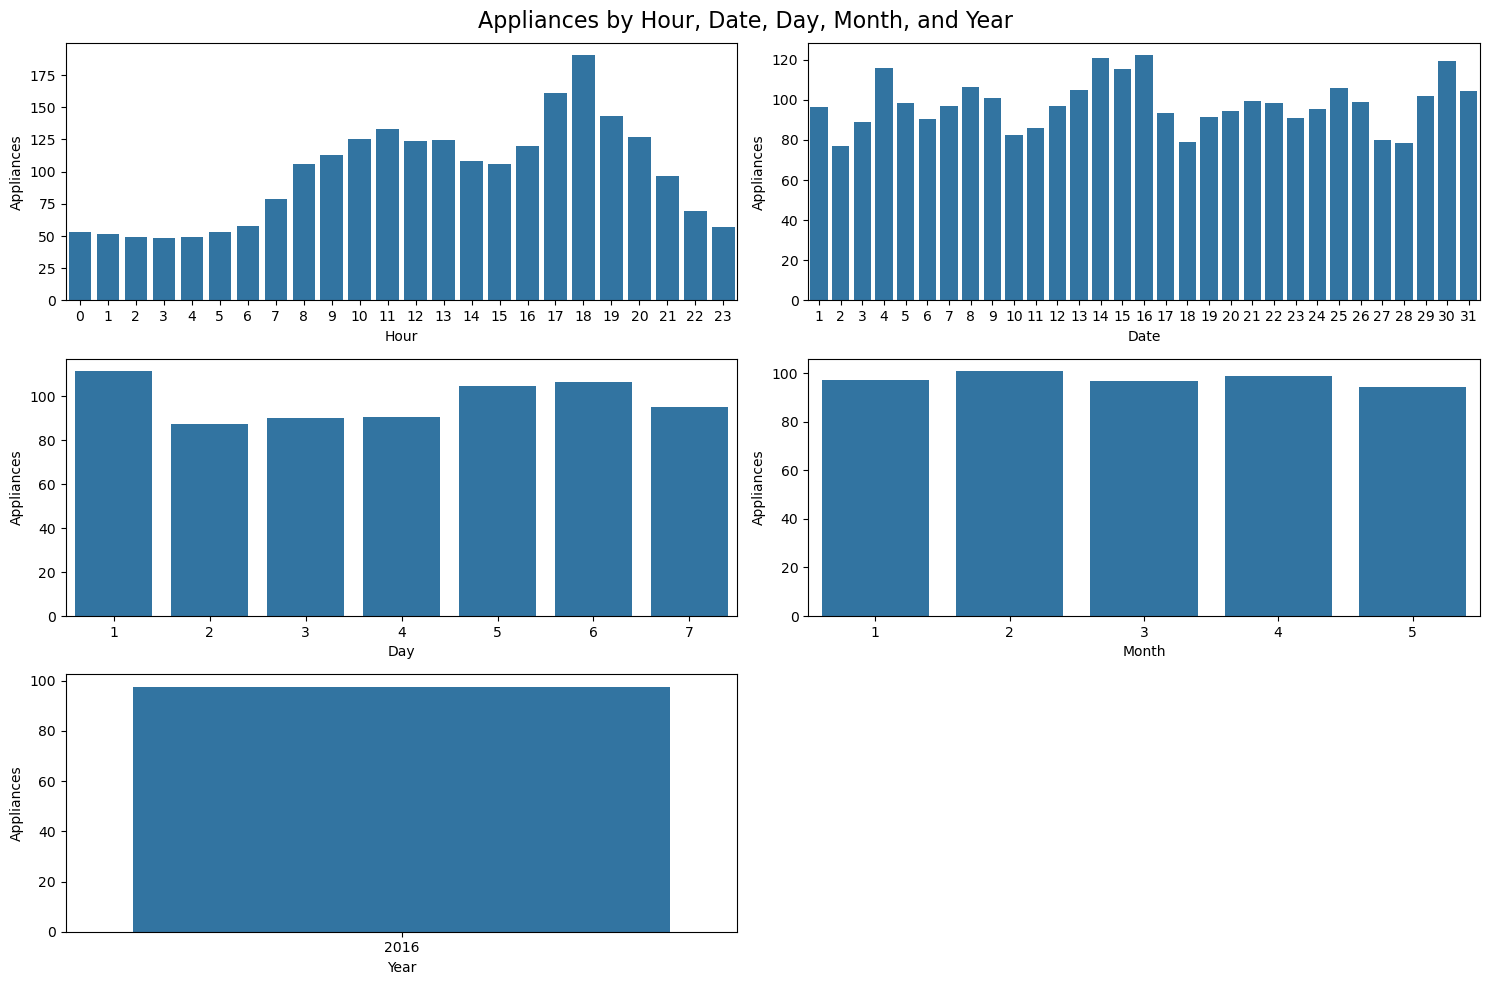

In [49]:
plt_time_dist(y='Appliances', df=df)

<Axes: xlabel='hour', ylabel='Appliances'>

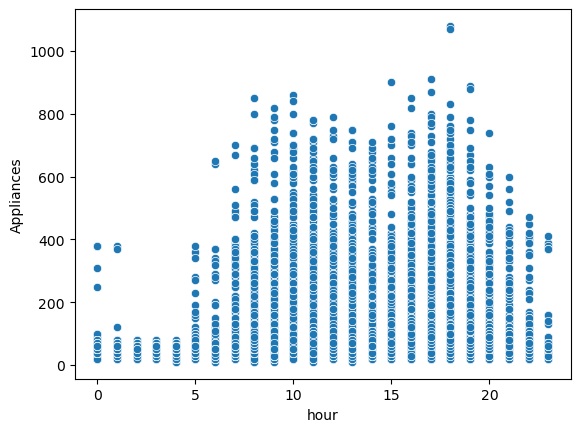

In [26]:
sns.scatterplot(x='hour', y='Appliances', data=df)